In [3]:
from craft.sigproc import SigprocFile
import numpy as np
from pylab import *

In [4]:
ifile = '/CRACO/DATA_01/craco/SB070049/scans/34/20250103062844/ics_b00.fil'

In [5]:
f = SigprocFile(ifile)

In [10]:
x = f.get_data(slice(0,256))

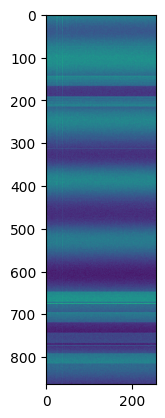

In [12]:
imshow(x.T)

In [13]:
from craco.visblock_accumulator import *

In [18]:
xin = x.reshape(256,36,-1).transpose(1,0,2)

In [19]:
xin.shape

(36, 256, 24)

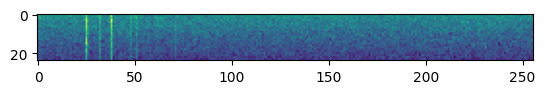

In [20]:
imshow(xin[0,:,:].T)

In [24]:
scrunched_ics = np.zeros((144,256),dtype=np.float32)

In [25]:
vis_nt = 32
nt = 256
vis_tscrunch = 1
vis_fscrunch = 6
for i in range(nt // vis_nt):
    tstart = i * vis_nt
    scrunch_ics(tstart, xin[:,i*vis_nt:(i+1)*vis_nt,:],scrunched_ics, vis_tscrunch, vis_fscrunch)


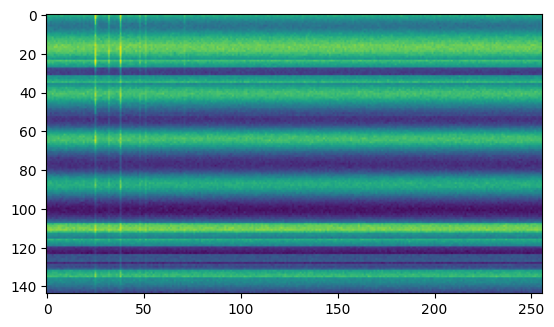

In [26]:
imshow(scrunched_ics)

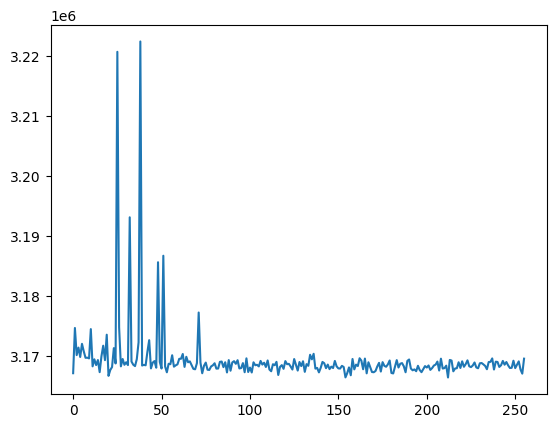

In [27]:
plot(scrunched_ics.sum(axis=0))

In [36]:
sfile = '/CRACO/DATA_01/craco/SB070049/scans/34/20250103062844/ics_scrunch_b00.fil'

In [52]:
f = SigprocFile(sfile)

In [53]:
bad = f.get_data(slice(0,256)).T

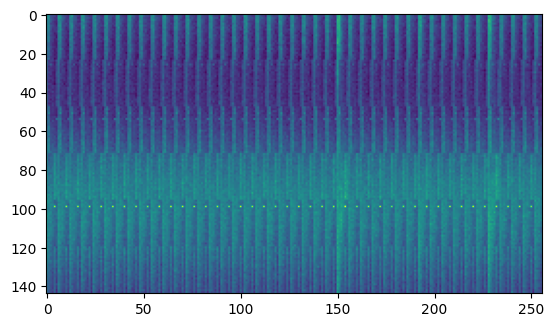

In [54]:
imshow(bad)

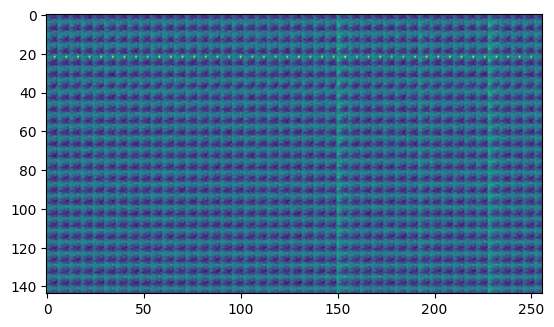

In [55]:
imshow(bad.reshape(6,-1,256).transpose(1,0,2).reshape(-1, 256))

In [66]:
cd /data/craco/craco/SB070059/scans/00/20250103115358


/data/SKADI_00_0/craco/SB070059/scans/00/20250103115358


/CRACO/SOFTWARE/ban115/venv310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [81]:
cd //data/craco/craco/SB070060/scans/00/20250103121054

/data/SKADI_00_0/craco/SB070060/scans/00/20250103121054


In [82]:
ls

20220714.fcm        beam09/  beam20/  beam31/               nodes/
all_beam_cands.txt  beam10/  beam21/  beam32/               params.parset
beam00/             beam11/  beam22/  beam33/               rank_000_trace.json
beam01/             beam12/  beam23/  beam34/               rank_036_trace.json
beam02/             beam13/  beam24/  beam35/               resetlogs.log
beam03/             beam14/  beam25/  beam.rank             run.log
beam04/             beam15/  beam26/  fixed_freq_flags.txt  rx.rank
beam05/             beam16/  beam27/  index.pkl             SCAN_START
beam06/             beam17/  beam28/  metafile.json         variables.parset
beam07/             beam18/  beam29/  mpihosts.txt
beam08/             beam19/  beam30/  mpipipeline.rank


In [83]:
d = np.load('nodes/01/icsraw_b00_iblk000.npy')

In [84]:
d.shape

(36, 32, 24)

In [85]:
dr = d.transpose(0,2,1).reshape(36*24,-1)

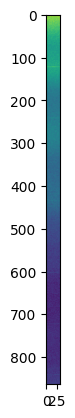

In [86]:
imshow(dr)

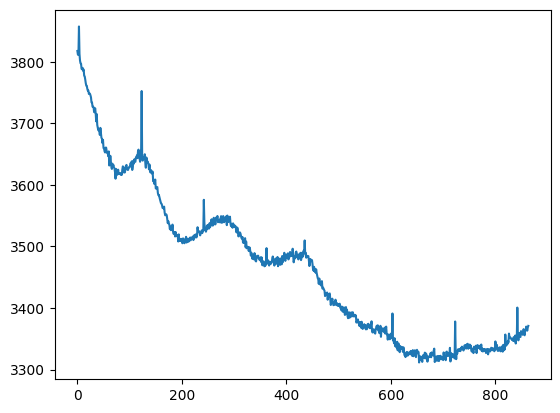

In [96]:
plot(dr.mean(axis=1))

In [93]:
ds = np.load('nodes/01/icsscrunch_b00_iblk007.npy')

In [94]:
ds.shape

(144, 256)

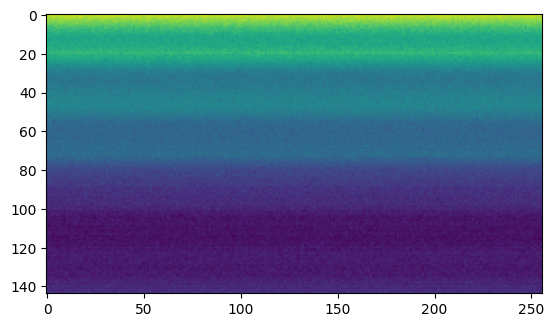

In [95]:
imshow(ds)

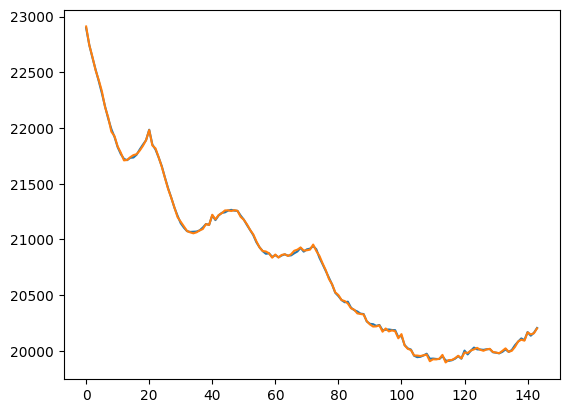

In [108]:
plot(ds.mean(axis=1))
plot(dr.mean(axis=1).reshape(-1,6).mean(axis=1)*6)